In [72]:
#Input vertices from FIJI

vertices = [
    (0.00, 0.00, 0.00),      # tile1
    (913.27, 5.24, 0.00),    # tile2
    (902.49, 920.44, 1.66),  # tile3
    (-16.66, 917.27, 2.32),  # tile4
    # (-29.58, 1837.83, 3.75), # tile5
    # (883.43, 1845.85, 5.24)  # tile6
]

In [73]:
vertices = [
    (0.00, 0.00),      # tile1
    (913.27, 5.24),    # tile2
    (902.49, 920.44),  # tile3
    (-16.66, 917.27),  # tile4
    # (-29.58, 1837.83, 3.75), # tile5
    # (883.43, 1845.85, 5.24)  # tile6
]

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def find_line_intersection(line1_start, line1_end, line2_start, line2_end):
    # Convert to numpy arrays
    p1, p2 = np.array(line1_start), np.array(line1_end)
    p3, p4 = np.array(line2_start), np.array(line2_end)
    
    # Calculate direction vectors
    v1 = p2 - p1
    v2 = p4 - p3
    
    # Calculate cross product
    cross_v1_v2 = np.cross(v1, v2)
    
    # If lines are parallel, return None
    if abs(cross_v1_v2) < 1e-10:
        return None
    
    # Calculate intersection parameter
    t = np.cross(p3 - p1, v2) / cross_v1_v2
    
    # Check if intersection point lies within both line segments
    if 0 <= t <= 1:
        u = np.cross(p3 - p1, v1) / cross_v1_v2
        if 0 <= u <= 1:
            # Calculate intersection point
            intersection = p1 + t * v1
            return intersection
    
    return None

def plot_top_view_2d(vertices):
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Colors and transparency for each rectangle
    colors = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan']
    alphas = [0.2] * len(vertices)
    
    # Create list to store rectangle edges
    all_edges = []
    
    # Plot each rectangle
    for i, vertex in enumerate(vertices):
        # Create rectangle corners (1024x1024)
        x = [vertex[0], vertex[0] + 1024, vertex[0] + 1024, vertex[0], vertex[0]]
        y = [vertex[1], vertex[1], vertex[1] + 1024, vertex[1] + 1024, vertex[1]]
        
        # Store edges
        edges = []
        for j in range(4):
            edges.append(
                (np.array([x[j], y[j]]), 
                 np.array([x[j+1], y[j+1]]))
            )
        all_edges.append(edges)
        
        # Plot the rectangle
        ax.fill(x, y, alpha=alphas[i], color=colors[i], label=f'Tile {i+1}')
        ax.plot(x, y, 'k-', linewidth=1)  # Black edges
        
        # Print vertex coordinates
        print(f"\nTile {i+1} vertices (x, y):")
        for vx, vy in zip(x[:-1], y[:-1]):
            print(f"({vx:.2f}, {vy:.2f})")
    
    # Find and plot intersections
    print("\nIntersection Points:")
    for i in range(len(vertices)):
        for j in range(i + 1, len(vertices)):
            # Check all edges between rectangle i and rectangle j
            for edge1 in all_edges[i]:
                for edge2 in all_edges[j]:
                    intersection = find_line_intersection(
                        edge1[0], edge1[1],
                        edge2[0], edge2[1]
                    )
                    if intersection is not None:
                        ax.plot(intersection[0], intersection[1], 'rx', markersize=2)
                        print(f"Between Tile {i+1} and Tile {j+1}: ({intersection[0]:.2f}, {intersection[1]:.2f})")

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Top View of Tiles with Intersection Points')
    ax.legend()
    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()





Tile 1 vertices (x, y):
(0.00, 0.00)
(1024.00, 0.00)
(1024.00, 1024.00)
(0.00, 1024.00)

Tile 2 vertices (x, y):
(913.27, 5.24)
(1937.27, 5.24)
(1937.27, 1029.24)
(913.27, 1029.24)

Tile 3 vertices (x, y):
(902.49, 920.44)
(1926.49, 920.44)
(1926.49, 1944.44)
(902.49, 1944.44)

Tile 4 vertices (x, y):
(-16.66, 917.27)
(1007.34, 917.27)
(1007.34, 1941.27)
(-16.66, 1941.27)

Intersection Points:
Between Tile 1 and Tile 2: (1024.00, 5.24)
Between Tile 1 and Tile 2: (913.27, 1024.00)
Between Tile 1 and Tile 3: (1024.00, 920.44)
Between Tile 1 and Tile 3: (902.49, 1024.00)
Between Tile 1 and Tile 4: (1007.34, 1024.00)
Between Tile 1 and Tile 4: (0.00, 917.27)
Between Tile 2 and Tile 3: (1926.49, 1029.24)
Between Tile 2 and Tile 3: (913.27, 920.44)
Between Tile 2 and Tile 4: (1007.34, 1029.24)
Between Tile 2 and Tile 4: (913.27, 917.27)
Between Tile 3 and Tile 4: (1007.34, 920.44)
Between Tile 3 and Tile 4: (902.49, 1941.27)


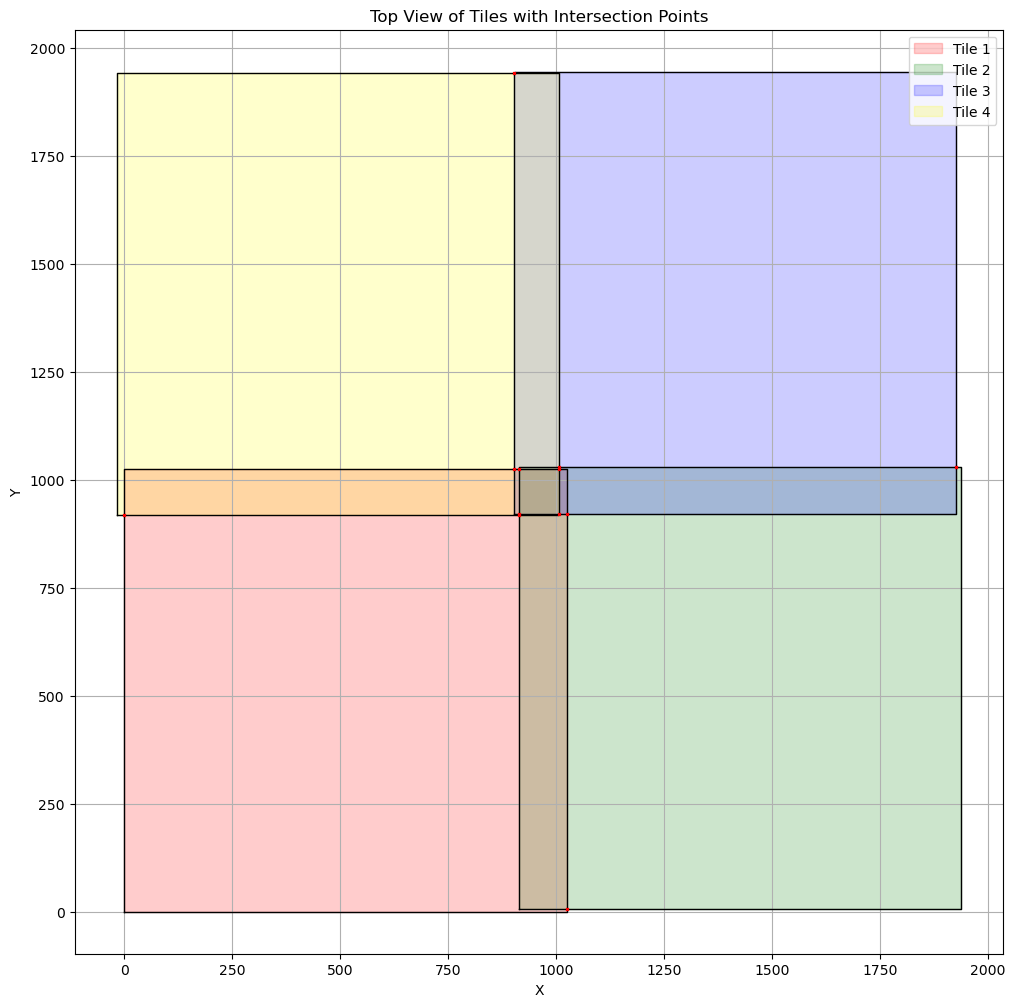

In [75]:
# Create the plot
plot_top_view_2d(vertices)


In [76]:
import numpy as np
import matplotlib.pyplot as plt

def find_line_intersection(line1_start, line1_end, line2_start, line2_end):
    # Convert to numpy arrays
    p1, p2 = np.array(line1_start), np.array(line1_end)
    p3, p4 = np.array(line2_start), np.array(line2_end)
    
    # Calculate direction vectors
    v1 = p2 - p1
    v2 = p4 - p3
    
    # Calculate cross product
    cross_v1_v2 = np.cross(v1, v2)
    
    # If lines are parallel, return None
    if abs(cross_v1_v2) < 1e-10:
        return None

    # Calculate intersection parameter
    t = np.cross(p3 - p1, v2) / cross_v1_v2
    
    # Check if intersection point lies within both line segments
    if 0 <= t <= 1:
        u = np.cross(p3 - p1, v1) / cross_v1_v2
        if 0 <= u <= 1:
            # Calculate intersection point
            intersection = p1 + t * v1
            return intersection
    
    return None

def find_closest_points(points, target):
    # Find closest points from left and right
    left_points = [p for p in points if p < target]
    right_points = [p for p in points if p > target]
    
    closest_left = max(left_points) if left_points else None
    closest_right = min(right_points) if right_points else None
    
    middle_point = (closest_left + closest_right) / 2 if closest_left and closest_right else None
    
    return closest_left, closest_right, middle_point

def plot_x_axis_projections(vertices, target_point=973, figsize=(15, 6)):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # List to store all intersection points and x-coordinates
    intersections = []
    x_coordinates = set()
    
    # For each vertex, create a 1024x1024 rectangle and store its x-coordinates
    for i, vertex in enumerate(vertices):
        x_start, y_start = vertex
        x_end = x_start + 1024
        
        # Add vertex x-coordinates
        x_coordinates.add(x_start)
        x_coordinates.add(x_end)
        
        # Create edges for current rectangle
        edges1 = [
            ((x_start, y_start), (x_end, y_start)),
            ((x_end, y_start), (x_end, y_start + 1024)),
            ((x_end, y_start + 1024), (x_start, y_start + 1024)),
            ((x_start, y_start + 1024), (x_start, y_start))
        ]
        
        # Check intersections with all other rectangles
        for j in range(i + 1, len(vertices)):
            x2_start, y2_start = vertices[j]
            x2_end = x2_start + 1024
            
            edges2 = [
                ((x2_start, y2_start), (x2_end, y2_start)),
                ((x2_end, y2_start), (x2_end, y2_start + 1024)),
                ((x2_end, y2_start + 1024), (x2_start, y2_start + 1024)),
                ((x2_start, y2_start + 1024), (x2_start, y2_start))
            ]
            
            # Check for intersections between edges
            for edge1 in edges1:
                for edge2 in edges2:
                    intersection = find_line_intersection(
                        np.array(edge1[0]), np.array(edge1[1]),
                        np.array(edge2[0]), np.array(edge2[1])
                    )
                    if intersection is not None:
                        intersections.append({
                            'x': intersection[0],
                            'tiles': (i+1, j+1)
                        })
                        x_coordinates.add(intersection[0])
    
    # Find closest points to target
    x_coords_list = sorted(list(x_coordinates))
    closest_left, closest_right, middle_point = find_closest_points(x_coords_list, target_point)
    
    # Draw x-axis
    ax.axhline(y=0, color='black', linewidth=1)
    
    # Plot intersection points
    colors = plt.cm.tab20(np.linspace(0, 1, len(vertices) * len(vertices)))
    color_idx = 0
    
    # Group intersections by tile pairs
    tile_pairs = {}
    for intersection in intersections:
        pair = intersection['tiles']
        if pair not in tile_pairs:
            tile_pairs[pair] = []
        tile_pairs[pair].append(intersection['x'])
    
    # Plot intersections
    y_offset = 0.1
    y_positions = {}
    
    for pair, x_points in tile_pairs.items():
        while y_offset in y_positions.values():
            y_offset += 0.1
        y_positions[pair] = y_offset
        
        color = colors[color_idx % len(colors)]
        for x in x_points:
            ax.plot([x, x], [-0.05, 0.05], color=color, linewidth=2)
            ax.text(x, y_offset, f'T{pair[0]}-T{pair[1]}\n({x:.2f})', 
                   ha='center', va='bottom', color=color, fontsize=8)
        
        color_idx += 1
    
    # Plot target point and closest points
    ax.plot([target_point, target_point], [-0.05, 0.05], color='red', linewidth=3, label='Target (973)')
    ax.text(target_point, -0.15, f'Target\n(973.00)', ha='center', va='top', color='red', fontsize=8)
    
    if closest_left is not None:
        ax.plot([closest_left, closest_left], [-0.05, 0.05], color='green', linewidth=3, label='A (Closest Left)')
        ax.text(closest_left, -0.15, f'A\n({closest_left:.2f})', ha='center', va='top', color='green', fontsize=8)
    
    if closest_right is not None:
        ax.plot([closest_right, closest_right], [-0.05, 0.05], color='blue', linewidth=3, label='B (Closest Right)')
        ax.text(closest_right, -0.15, f'B\n({closest_right:.2f})', ha='center', va='top', color='blue', fontsize=8)
    
    if middle_point is not None:
        ax.plot([middle_point, middle_point], [-0.05, 0.05], color='purple', linewidth=3, label='Middle Point')
        ax.text(middle_point, 0.15, f'Middle Point\n({middle_point:.2f})', ha='center', va='bottom', color='purple', fontsize=8)
    
    # Set axis limits
    all_x = [point['x'] for point in intersections] + [target_point]
    if closest_left is not None: all_x.append(closest_left)
    if closest_right is not None: all_x.append(closest_right)
    if middle_point is not None: all_x.append(middle_point)
    
    x_min, x_max = min(all_x), max(all_x)
    margin = (x_max - x_min) * 0.1
    ax.set_xlim(x_min - margin, x_max + margin)
    ax.set_ylim(-0.2, max(y_positions.values(), default=0.2) + 0.2)
    
    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_title('Intersection Points Projected on X-axis')
    
    # Remove y-axis ticks and labels
    ax.set_yticks([])
    
    # Add grid
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # Add legend
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    return plt




In [77]:
import numpy as np
import matplotlib.pyplot as plt

def find_line_intersection(line1_start, line1_end, line2_start, line2_end):
    # Convert to numpy arrays
    p1, p2 = np.array(line1_start), np.array(line1_end)
    p3, p4 = np.array(line2_start), np.array(line2_end)
    
    # Calculate direction vectors
    v1 = p2 - p1
    v2 = p4 - p3
    
    # Calculate cross product
    cross_v1_v2 = np.cross(v1, v2)
    
    # If lines are parallel, return None
    if abs(cross_v1_v2) < 1e-10:
        return None
    
    # Calculate intersection parameter
    t = np.cross(p3 - p1, v2) / cross_v1_v2
    
    # Check if intersection point lies within both line segments
    if 0 <= t <= 1:
        u = np.cross(p3 - p1, v1) / cross_v1_v2
        if 0 <= u <= 1:
            # Calculate intersection point
            intersection = p1 + t * v1
            return intersection
    
    return None

def get_all_x_coordinates(vertices):
    """Get all X coordinates from vertices and their intersections"""
    x_coordinates = set()
    intersections = []
    
    # For each vertex, create a 1024x1024 rectangle and find intersections
    for i, vertex in enumerate(vertices):
        x_start, y_start = vertex
        x_end = x_start + 1024
        
        # Add vertex x-coordinates
        x_coordinates.add(x_start)
        x_coordinates.add(x_end)
        
        # Create edges for current rectangle
        edges1 = [
            ((x_start, y_start), (x_end, y_start)),
            ((x_end, y_start), (x_end, y_start + 1024)),
            ((x_end, y_start + 1024), (x_start, y_start + 1024)),
            ((x_start, y_start + 1024), (x_start, y_start))
        ]
        
        # Check intersections with all other rectangles
        for j in range(i + 1, len(vertices)):
            x2_start, y2_start = vertices[j]
            x2_end = x2_start + 1024
            
            edges2 = [
                ((x2_start, y2_start), (x2_end, y2_start)),
                ((x2_end, y2_start), (x2_end, y2_start + 1024)),
                ((x2_end, y2_start + 1024), (x2_start, y2_start + 1024)),
                ((x2_start, y2_start + 1024), (x2_start, y2_start))
            ]
            
            # Check for intersections between edges
            for edge1 in edges1:
                for edge2 in edges2:
                    intersection = find_line_intersection(
                        np.array(edge1[0]), np.array(edge1[1]),
                        np.array(edge2[0]), np.array(edge2[1])
                    )
                    if intersection is not None:
                        intersections.append({
                            'x': intersection[0],
                            'tiles': (i+1, j+1)
                        })
                        x_coordinates.add(intersection[0])
    
    return sorted(list(x_coordinates)), intersections

def find_AB_points(vertices, target_point):
    """Find points A and B closest to the target point"""
    x_coordinates, intersections = get_all_x_coordinates(vertices)
    
    # Find closest points from left and right
    left_points = [p for p in x_coordinates if p < target_point]
    right_points = [p for p in x_coordinates if p > target_point]
    
    point_A = max(left_points) if left_points else None
    point_B = min(right_points) if right_points else None
    middle_point = (point_A + point_B) / 2 if point_A and point_B else None
    
    return {
        'point_A': point_A,
        'point_B': point_B,
        'middle_point': middle_point,
        'intersections': intersections
    }

In [78]:
def calculate_target_point(size, overlap_percent):
    target_point = size * (100 - (overlap_percent * 1/2)) / 100
    return target_point

In [79]:
# Example usage
size = 1024
overlap_percent = 10
target_point = calculate_target_point(size, overlap_percent)
target_point

972.8


Analysis Results:
Target point: 972.80
Point A (Left): 913.27
Point B (Right): 1007.34
Middle point between A and B: 960.305


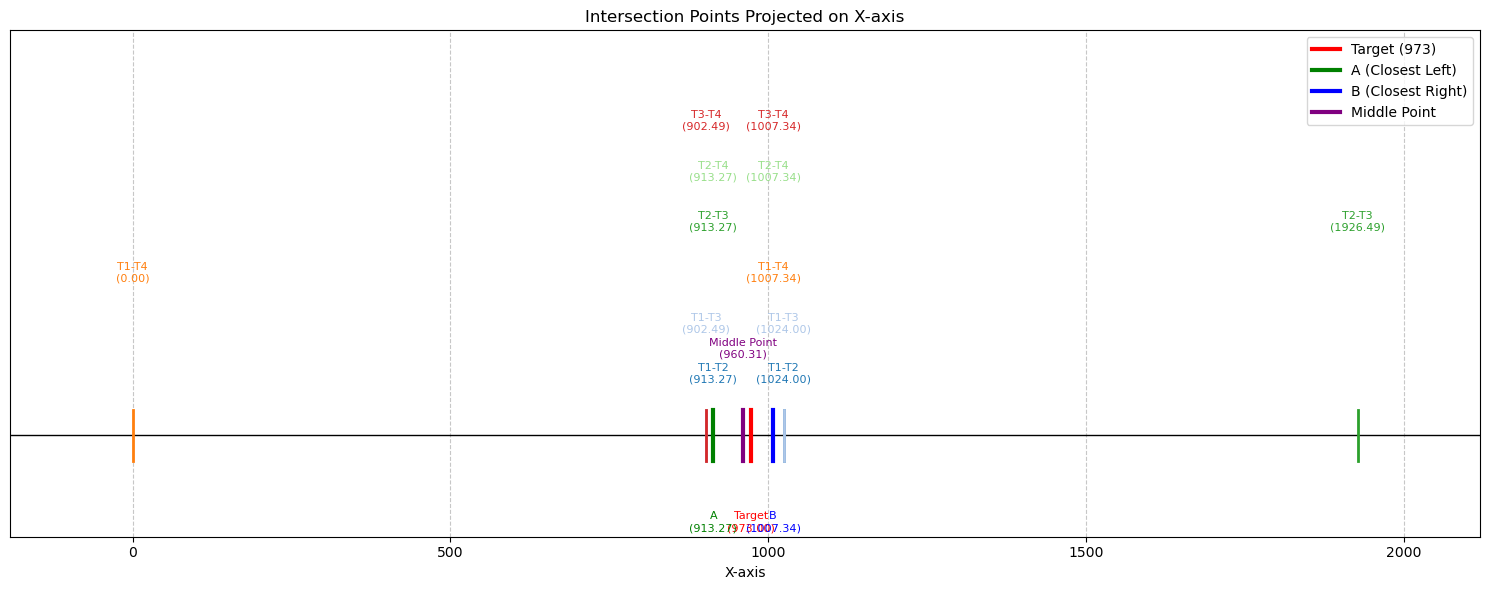

In [80]:
# First store the returned dictionary in a variable
results = find_AB_points(vertices, target_point)

# Then access the values using the dictionary keys
point_A = results['point_A']
point_B = results['point_B']
middle_point = results['middle_point']

# Now you can use these values
print("\nAnalysis Results:")
print(f"Target point: {target_point:.2f}")
print(f"Point A (Left): {point_A:.2f}")
print(f"Point B (Right): {point_B:.2f}")
print(f"Middle point between A and B: {middle_point:.3f}")

# Create plot
plt = plot_x_axis_projections(vertices, target_point)
plt.show()